In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityData = "city_data.csv"
rideData = "ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(cityData)
rideData = pd.read_csv(rideData)

# Combine the data into a single dataset
rideSharingData = pd.merge(rideData, cityData, on="city", how="inner")

# Display the data table for preview
rideSharingData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

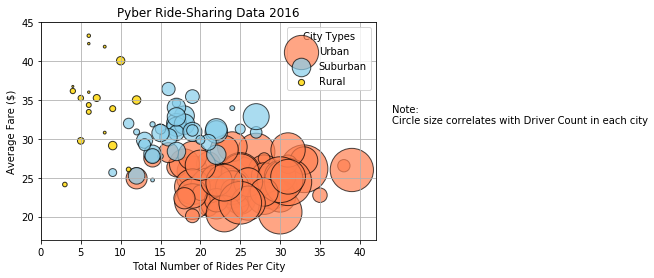

In [41]:
# Obtain the x and y coordinates for each of the three city types
groupByCity = rideSharingData.groupby(["type", "city"])

totalRidesByCity = groupByCity.count()[["date"]]

avgFare = round(groupByCity.mean()[["fare"]], 2)

driverCount = groupByCity.sum()[["driver_count"]]

finalPlot = pd.merge(totalRidesByCity, avgFare, on=["type", "city"])
finalPlot = pd.merge(finalPlot, driverCount, on=["type", "city"])
finalPlot.columns = ["Total Number of Rides (Per City)", "Average Fare ($)", "Driver Count"]
finalPlot = finalPlot.reset_index()

# Build the scatter plots for each city types
fig, ax = plt.subplots()

ruralCities = finalPlot.loc[finalPlot.type == "Rural"]
suburbanCities = finalPlot.loc[finalPlot.type == "Suburban"]
urbanCities = finalPlot.loc[finalPlot.type == "Urban"]
urbanPlot = ax.scatter(urbanCities["Total Number of Rides (Per City)"], urbanCities["Average Fare ($)"], s=urbanCities["Driver Count"], color="Coral", edgecolors="black", label="Urban")
suburbanPlot = ax.scatter(suburbanCities["Total Number of Rides (Per City)"], suburbanCities["Average Fare ($)"], s=suburbanCities["Driver Count"], color="SkyBlue", edgecolors="black", label="Suburban")
ruralPlot = ax.scatter(ruralCities["Total Number of Rides (Per City)"], ruralCities["Average Fare ($)"], s=ruralCities["Driver Count"], color="Gold", edgecolors="black", label="Rural")

# Incorporate the other graph properties
ruralPlot.set_alpha(0.8)
suburbanPlot.set_alpha(0.7)
urbanPlot.set_alpha(0.7)

# Create a legend
ax.set_title("Pyber Ride-Sharing Data 2016")
ax.legend(loc="upper right", title="City Types")
ax.set_xlabel("Total Number of Rides Per City")
ax.set_ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(44, 32, "Note:\nCircle size correlates with Driver Count in each city")

# Save Figure
plt.grid()
plt.ylim(17,45)
plt.xlim(0,42)
plt.show()

## Total Fares by City Type

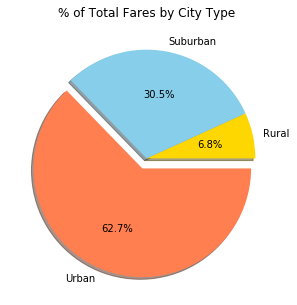

In [98]:
# Calculate Type Percents
groupByCity = rideSharingData.groupby(["type"])
faresByType = groupByCity.sum()[["fare"]]

totalSumOfFares = rideSharingData.fare.sum()

faresByType["Percent"] = round(faresByType.fare * 100 / totalSumOfFares, 2)
faresByType = faresByType[["Percent"]]
faresByType = faresByType.reset_index()

# Build Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
chart = ax.pie(faresByType.Percent, explode=[0,0,0.1], labels=faresByType.type, colors=["Gold","SkyBlue","Coral"], autopct='%1.1f%%',
       shadow=True)

# Save Figure
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

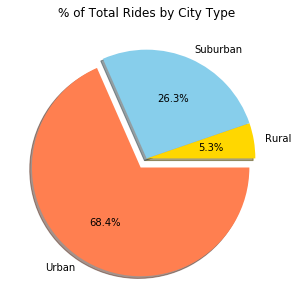

In [113]:
# Calculate Ride Percents
groupByType = rideSharingData.groupby(["type"])

ridesByType = groupByType.count()[["date"]]
totalNumberOfRides = rideSharingData.date.count()

ridesByType[["Percent"]] = round(ridesByType * 100 / totalNumberOfRides, 2)
ridesByType = ridesByType[["Percent"]]
ridesByType = ridesByType.reset_index()

# Build Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
chart = ax.pie(ridesByType.Percent, explode=[0,0,0.1], labels=ridesByType.type, colors=["Gold","SkyBlue","Coral"], autopct='%1.1f%%',
       shadow=True)

# Save Figure
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

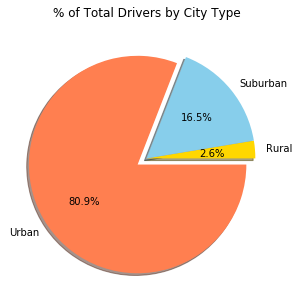

In [130]:
# Calculate Driver Percents
groupByType = cityData.groupby(["type"])

driversByType = groupByType.sum()[["driver_count"]]
totalNumberOfDrivers = driversByType.sum().driver_count
driversByType["Percent"] = round(driversByType.driver_count * 100 / totalNumberOfDrivers, 2)
driversByType = driversByType[["Percent"]]
driversByType = driversByType.reset_index()

# Build Pie Charts
fig, ax = plt.subplots(figsize=(5,5))
chart = ax.pie(driversByType.Percent, explode=[0,0,0.1], labels=driversByType.type, colors=["Gold","SkyBlue","Coral"], autopct='%1.1f%%',
       shadow=True)

# Save Figure
plt.title("% of Total Drivers by City Type")
plt.show()

Observations

In [ ]:
1) Rural rides are the most profitable on a per ride basis
2) The urban rides provide a lower average fare than the other 2 types
3) The rural drivers are the busiest of the three types, as they each have a higher average of rides